In [1]:
import pandas as pd #for data manipulation
import numpy as np #for numerical nalysis
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt #for data visualization
import nltk
from nltk import word_tokenize
import os
import string
import re

In [2]:
#load data
swahili_data=pd.read_csv('swahili.csv')

In [3]:
#view the first 10 items
swahili_data.head(10)

,Unnamed: 0,text,labels
0,0,team 2019merimera alikuwa takataka,negative
1,1,sijafurahishwa,negative
2,2,kubuni dosari,negative
3,3,bila kusema nilipoteza pesa zangu,negative
4,4,sema kupoteza pesa na wakati,negative
5,5,ubunifu ni isiyo ya kawaida sana kwani kipande...,negative
6,6,akili yako imeoza,negative
7,7,aki si maisha ni magumu,negative
8,8,enyewe safaricom ni wezi,negative
9,9,mtandao duni hata line yao niliweka nyuma ya s...,negative


In [4]:
# View the DataFrame Information
swahili_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3925 entries, 0 to 3924
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3925 non-null   int64 
 1   text        3925 non-null   object
 2   labels      3925 non-null   object
dtypes: int64(1), object(2)
memory usage: 92.1+ KB


In [5]:
# View DataFrame Statistical Summary
swahili_data.describe()

,Unnamed: 0
count,3925.000000
mean,1254.993631
std,885.518930
min,0.000000
25%,490.000000
50%,1037.000000
75%,2018.000000
max,2999.000000


In [6]:
#checks for null elements
swahili_data.isnull()

,Unnamed: 0,text,labels
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
3920,False,False,False
3921,False,False,False
3922,False,False,False
3923,False,False,False


<AxesSubplot:>

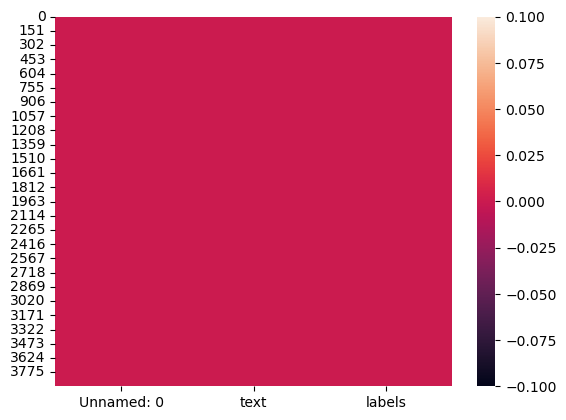

In [7]:
#checks for null elements
sns.heatmap(swahili_data.isnull())

In [8]:
#feature extraction:Length of the review text
swahili_data['length']=swahili_data['text'].apply(len)
swahili_data

,Unnamed: 0,text,labels,length
0,0,team 2019merimera alikuwa takataka,negative,34
1,1,sijafurahishwa,negative,14
2,2,kubuni dosari,negative,13
3,3,bila kusema nilipoteza pesa zangu,negative,33
4,4,sema kupoteza pesa na wakati,negative,28
...,...,...,...,...
3920,2995,Nafikiri chakula chapasa kuwa na ladha na umbi...,negative,77
3921,2996,hamu ya kula ilitoweka mara moja,negative,32
3922,2997,Kwa ujumla sikuvutiwa na nisirudi nyuma,negative,39
3923,2998,Mambo yote yaliyoonwa yalikuwa chini ya kiwang...,negative,122


In [9]:
sorted_data = swahili_data.sort_values(by='length')

In [10]:
#the tail() function to displays the longest text:
print(sorted_data.tail(1)['text'])

650    hii ni sehemu nzuri ya utengenezaji wa filamu ...
Name: text, dtype: object


In [11]:
#The head() function to displays the shortest text:
print(sorted_data.head(1)['text'])

2945    kla
Name: text, dtype: object


<AxesSubplot:ylabel='Frequency'>

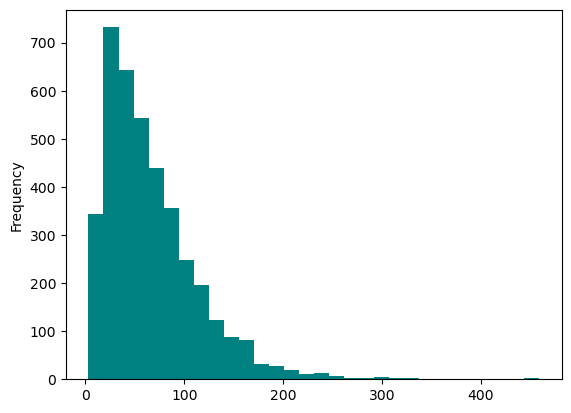

In [16]:
# Plot the histogram for the length
swahili_data['length'].plot(bins = 30, kind= 'hist', color = 'teal')

In [12]:
# Obtain only the negative reviews
negative_feedback = swahili_data[swahili_data['labels'] == 'negative' ]
print(negative_feedback)

      Unnamed: 0                                               text    labels  \
0              0                 team 2019merimera alikuwa takataka  negative   
1              1                                     sijafurahishwa  negative   
2              2                                      kubuni dosari  negative   
3              3                  bila kusema nilipoteza pesa zangu  negative   
4              4                       sema kupoteza pesa na wakati  negative   
...          ...                                                ...       ...   
3920        2995  Nafikiri chakula chapasa kuwa na ladha na umbi...  negative   
3921        2996                   hamu ya kula ilitoweka mara moja  negative   
3922        2997            Kwa ujumla sikuvutiwa na nisirudi nyuma  negative   
3923        2998  Mambo yote yaliyoonwa yalikuwa chini ya kiwang...  negative   
3924        2999  Basi ni kana kwamba nilipoteza maisha yangu ya...  negative   

      length  
0         34

In [13]:
# Obtain only the positive reviews
positive_feedback = swahili_data[swahili_data['labels'] == 'positive' ]
print(positive_feedback)

      Unnamed: 0                                               text    labels  \
423          423                                yeye ni mrembo sana  positive   
424          424                          tunaipenda hii ngoma sana  positive   
425          425  yani nahisi mapenzi hadi kwa miguu naipenda ng...  positive   
426          426  waah hii ngoma ilikua imeshika nikiwa darasa l...  positive   
427          427          safi mgenge2018 na hii ngoma bado ni moto  positive   
...          ...                                                ...       ...   
3824        2899                             Mambo mengi yaliyoonwa  positive   
3826        2901  Mkate wao uliochomwa kwa ukawaida ulitosheleza...  positive   
3832        2907  vibanzi na vyombo vinavyoweza kuuzwa hapa ni v...  positive   
3834        2909           Hapa ndipo mahali ninapopaona vegas mpya  positive   
3847        2922  kila wakati nilapo hapa mimi huona ushirikiano...  positive   

      length  
423       19

In [14]:
# function to clean text
def clean_text(sentence):
    '''
        function to clean content column, make it ready for transformation and modeling
    '''
    sentence = sentence.lower()                #convert text to lower-case
    sentence = re.sub('â€˜','',sentence)    # remove the text â€˜ which appears to occur flequently
    sentence = re.sub('[‘’“”…,]', '', sentence) # remove punctuation
    sentence = re.sub('[()]', '', sentence)  #remove parentheses
    sentence = re.sub("[^a-zA-Z]"," ",sentence) #remove numbers and keep text/alphabet only
    sentence = word_tokenize(sentence)      # remove repeated characters (tanzaniaaaaaaaa to tanzania)
    
    return ' '.join(sentence)

In [15]:
swahili_data['text'] = swahili_data['text'].apply(clean_text)
swahili_data

,Unnamed: 0,text,labels,length
0,0,team merimera alikuwa takataka,negative,34
1,1,sijafurahishwa,negative,14
2,2,kubuni dosari,negative,13
3,3,bila kusema nilipoteza pesa zangu,negative,33
4,4,sema kupoteza pesa na wakati,negative,28
...,...,...,...,...
3920,2995,nafikiri chakula chapasa kuwa na ladha na umbi...,negative,77
3921,2996,hamu ya kula ilitoweka mara moja,negative,32
3922,2997,kwa ujumla sikuvutiwa na nisirudi nyuma,negative,39
3923,2998,mambo yote yaliyoonwa yalikuwa chini ya kiwang...,negative,122
